## Task 2

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# NLP preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nisha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#  Load Dataset
TRAIN_FILE_PATH = "train.csv"
TEST_FILE_PATH = "test.csv"

data = pd.read_csv(TRAIN_FILE_PATH)
testdata = pd.read_csv(TEST_FILE_PATH)

# Rename columns
data.columns = ['ClassIndex', 'Title', 'Description']
testdata.columns = ['ClassIndex', 'Title', 'Description']

# Combine Title + Description
X_train = data['Title'] + " " + data['Description']
y_train = data['ClassIndex'].apply(lambda x: x-1)

X_test = testdata['Title'] + " " + testdata['Description']
y_test = testdata['ClassIndex'].apply(lambda x: x-1)


In [4]:
# Text Preprocessing

In [7]:
#  Text Preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

X_train = X_train.apply(clean_text)
X_test = X_test.apply(clean_text)


In [8]:
#TF-IDF Vectorization

In [9]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_vec, y_train)
y_pred_lr = log_reg.predict(X_test_vec)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, target_names=['World','Sports','Business','Sci/Tech']))


Logistic Regression Results
Accuracy: 0.9085526315789474
              precision    recall  f1-score   support

       World       0.92      0.90      0.91      1900
      Sports       0.95      0.98      0.96      1900
    Business       0.88      0.87      0.87      1900
    Sci/Tech       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600



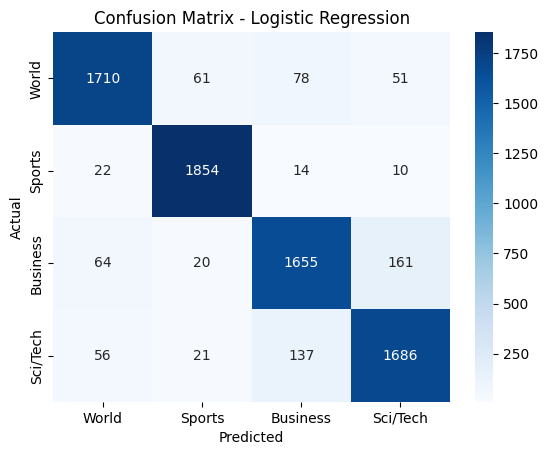

In [11]:
# Confusion Matrix (Logistic Regression)
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['World','Sports','Business','Sci/Tech'],
            yticklabels=['World','Sports','Business','Sci/Tech'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [12]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['World','Sports','Business','Sci/Tech']))



Random Forest Results
Accuracy: 0.8905263157894737
              precision    recall  f1-score   support

       World       0.90      0.89      0.90      1900
      Sports       0.92      0.96      0.94      1900
    Business       0.87      0.85      0.86      1900
    Sci/Tech       0.87      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600



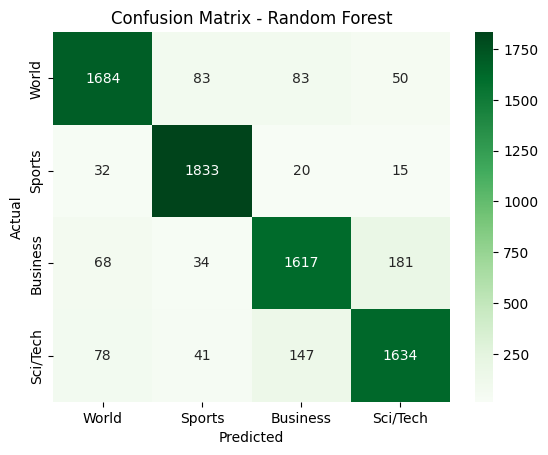

In [13]:
# Confusion Matrix (Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['World','Sports','Business','Sci/Tech'],
            yticklabels=['World','Sports','Business','Sci/Tech'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


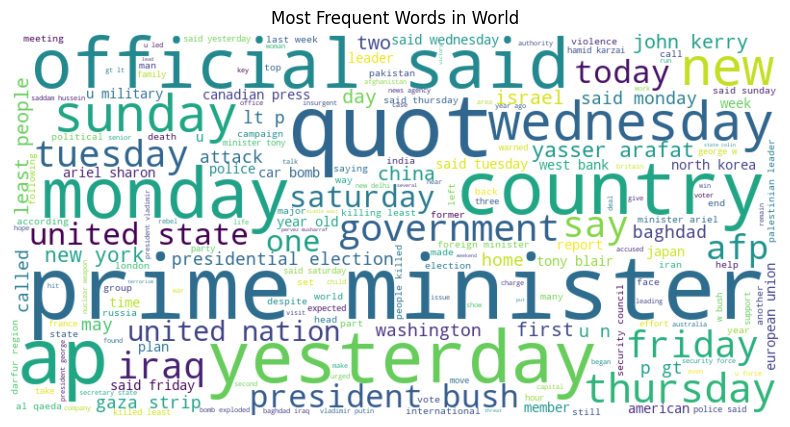

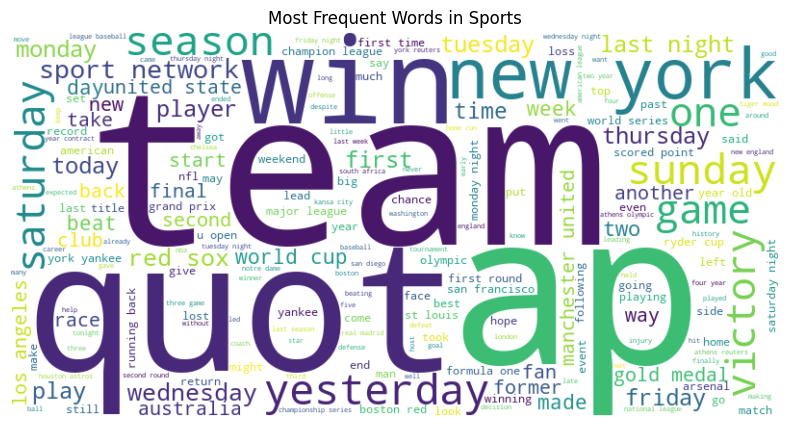

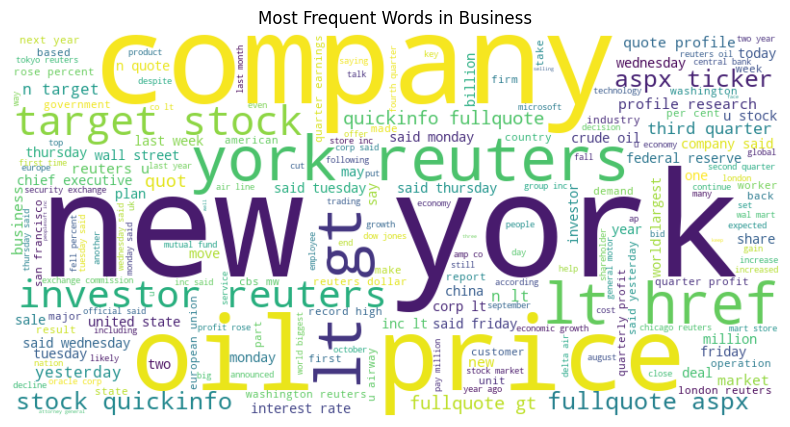

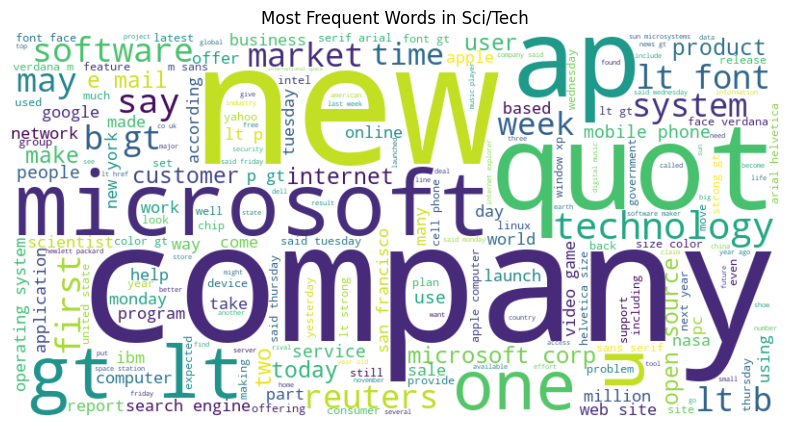

In [14]:
# Word Cloud per Category
for i, label in enumerate(['World','Sports','Business','Sci/Tech'], start=1):
    text_cat = " ".join(data[data['ClassIndex']==i]['Description'].apply(clean_text))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cat)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Frequent Words in {label}")
    plt.show()
